In [3]:
import pandas as pd


In [4]:
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\titanic.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Age=df.Age.fillna(df.Age.mean())

In [8]:
df.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [11]:
df.Sex=df.Sex.map({'male':0,'female':1})


In [12]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
886,0,2,0,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,0,26.000000


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [14]:
x=df[['Pclass','Sex','Age']]
y=df[['Survived']]

In [15]:
x


,Pclass,Sex,Age
0,3,0,22.000000
1,1,1,38.000000
2,3,1,26.000000
3,1,1,35.000000
4,3,0,35.000000
...,...,...,...
886,2,0,27.000000
887,1,1,19.000000
888,3,1,29.699118
889,1,0,26.000000


In [16]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_train

,Pclass,Sex,Age
814,3,0,30.500000
546,2,1,19.000000
219,2,0,30.000000
821,3,0,27.000000
169,3,0,28.000000
...,...,...,...
826,3,0,29.699118
28,3,1,29.699118
812,2,0,35.000000
140,3,1,29.699118


In [19]:
x_test

,Pclass,Sex,Age
220,3,0,16.000000
760,3,0,29.699118
529,2,0,23.000000
853,1,1,16.000000
825,3,0,29.699118
...,...,...,...
201,3,0,29.699118
521,3,0,22.000000
186,3,1,29.699118
358,3,1,29.699118


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
acc=accuracy_score(y_test,y_pred)

In [23]:
acc

0.8268156424581006

In [24]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
acc=accuracy_score(y_test,y_pred)
acc

0.6201117318435754

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

<ipython-input-26-1048401316d1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


0.7597765363128491

In [27]:
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
886,0,2,0,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,0,26.000000


In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [29]:
y_pred=model.predict(x_test)

In [30]:
acc=accuracy_score(y_test,y_pred)
acc

0.8100558659217877

In [31]:
from sklearn.cluster import KMeans

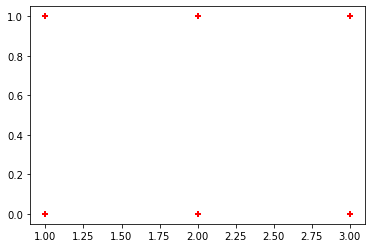

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df.Pclass,df.Survived,marker='+',color='r')


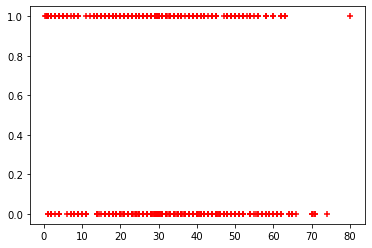

In [33]:
plt.scatter(df.Age,df.Survived,marker='+',color='r')


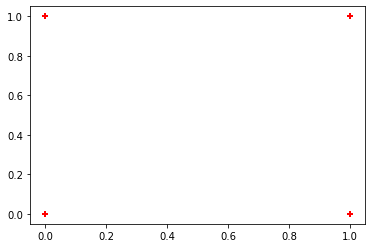

In [34]:
plt.scatter(df.Sex,df.Survived,marker='+',color='r')

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

df['Pclass']=sc.fit_transform(df[['Pclass']])
df['Survived']=sc.fit_transform(df[['Survived']])
df

,Survived,Pclass,Sex,Age
0,0.0,1.0,0,22.000000
1,1.0,0.0,1,38.000000
2,1.0,1.0,1,26.000000
3,1.0,0.0,1,35.000000
4,0.0,1.0,0,35.000000
...,...,...,...,...
886,0.0,0.5,0,27.000000
887,1.0,0.0,1,19.000000
888,0.0,1.0,1,29.699118
889,1.0,0.0,0,26.000000


<ipython-input-36-1d076d3a12d9>:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(df[['Pclass','Survived']])
<ipython-input-36-1d076d3a12d9>:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(df[['Pclass','Survived']])
<ipython-input-36-1d076d3a12d9>:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(df[['Pclass','Survived']])


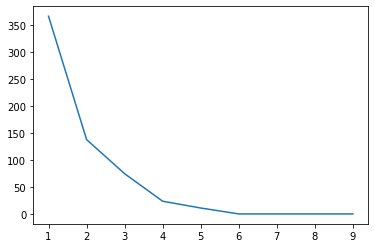

In [36]:
kval=range(1,10)
SSE=[]

for i in kval:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Pclass','Survived']])
    SSE.append(kmeans.inertia_)
plt.plot(kval,SSE)    

In [37]:
kmeans=KMeans(n_clusters=2)

In [38]:
y_pred=kmeans.fit_predict(df[['Pclass','Survived']])

In [39]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [40]:
df['group']=y_pred

In [41]:
df

,Survived,Pclass,Sex,Age,group
0,0.0,1.0,0,22.000000,0
1,1.0,0.0,1,38.000000,1
2,1.0,1.0,1,26.000000,1
3,1.0,0.0,1,35.000000,1
4,0.0,1.0,0,35.000000,0
...,...,...,...,...,...
886,0.0,0.5,0,27.000000,0
887,1.0,0.0,1,19.000000,1
888,0.0,1.0,1,29.699118,0
889,1.0,0.0,0,26.000000,1


In [42]:
df0=df[df['group']==0]
df0

,Survived,Pclass,Sex,Age,group
0,0.0,1.0,0,22.000000,0
4,0.0,1.0,0,35.000000,0
5,0.0,1.0,0,29.699118,0
6,0.0,0.0,0,54.000000,0
7,0.0,1.0,0,2.000000,0
...,...,...,...,...,...
884,0.0,1.0,0,25.000000,0
885,0.0,1.0,1,39.000000,0
886,0.0,0.5,0,27.000000,0
888,0.0,1.0,1,29.699118,0


In [43]:
df1=df[df['group']==1]
df1

,Survived,Pclass,Sex,Age,group
1,1.0,0.0,1,38.0,1
2,1.0,1.0,1,26.0,1
3,1.0,0.0,1,35.0,1
8,1.0,1.0,1,27.0,1
9,1.0,0.5,1,14.0,1
...,...,...,...,...,...
875,1.0,1.0,1,15.0,1
879,1.0,0.0,1,56.0,1
880,1.0,0.5,1,25.0,1
887,1.0,0.0,1,19.0,1


Text(0, 0.5, 'Survived')

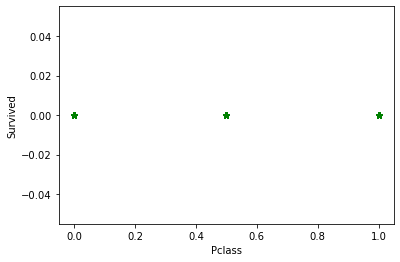

In [44]:
plt.scatter(df0.Pclass,df0.Survived,marker='*',color='green')
plt.xlabel('Pclass')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

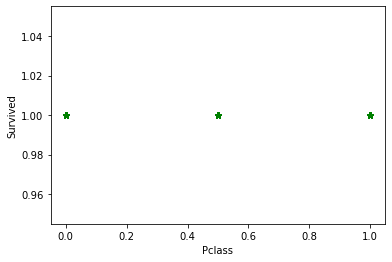

In [45]:
plt.scatter(df1.Pclass,df1.Survived,marker='*',color='green')
plt.xlabel('Pclass')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

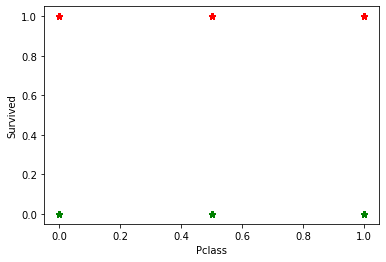

In [46]:
plt.scatter(df0.Pclass,df0.Survived,marker='*',color='green')
plt.scatter(df1.Pclass,df1.Survived,marker='*',color='red')
plt.xlabel('Pclass')
plt.ylabel('Survived')

In [47]:
kmeans.cluster_centers_

array([[7.65938069e-01, 2.22044605e-15],
       [4.75146199e-01, 1.00000000e+00]])

Text(0, 0.5, 'Survived')

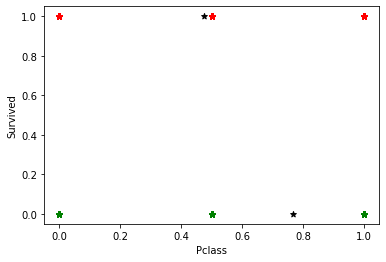

In [48]:
plt.scatter(df0.Pclass,df0.Survived,marker='*',color='green')
plt.scatter(df1.Pclass,df1.Survived,marker='*',color='red')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='black')
plt.xlabel('Pclass')
plt.ylabel('Survived')

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

<ipython-input-50-ac0e5e507372>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [51]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [52]:
acc=accuracy_score(y_test,y_pred)
acc

0.8324022346368715

In [53]:
acc*100

83.24022346368714

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()

In [56]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [57]:
acc=accuracy_score(y_test,y_pred)
acc

0.8324022346368715

In [58]:
acc*100

83.24022346368714

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [61]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [62]:
acc=accuracy_score(y_test,y_pred)
acc

0.7653631284916201

In [63]:
model.score(x_train,y_train)

0.8539325842696629

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost
ERROR: No matching distribution found for xgboost
